In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "Electric_Consumption_And_Cost__2010_-_Feb_2025__20250512.csv"
df = pd.read_csv(file_path)

df['Revenue Month'] = pd.to_datetime(df['Revenue Month'], errors='coerce')
df_cleaned = df.dropna(subset=['Revenue Month', 'Borough', 'Consumption (KWH)'])

# Remove unwante Data
unwanted_boroughs = ['FHA', 'NON DEVELOPMENT FACILITY', 'NYCHA CENTRAL OFFICE']

#Keep only relevant columns
df_cleaned = df_cleaned[~df_cleaned['Borough'].isin(unwanted_boroughs)]


/var/folders/b5/rq3jfylx1cs5ystwv491hgf40000gn/T/ipykernel_88701/1520155223.py:7: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


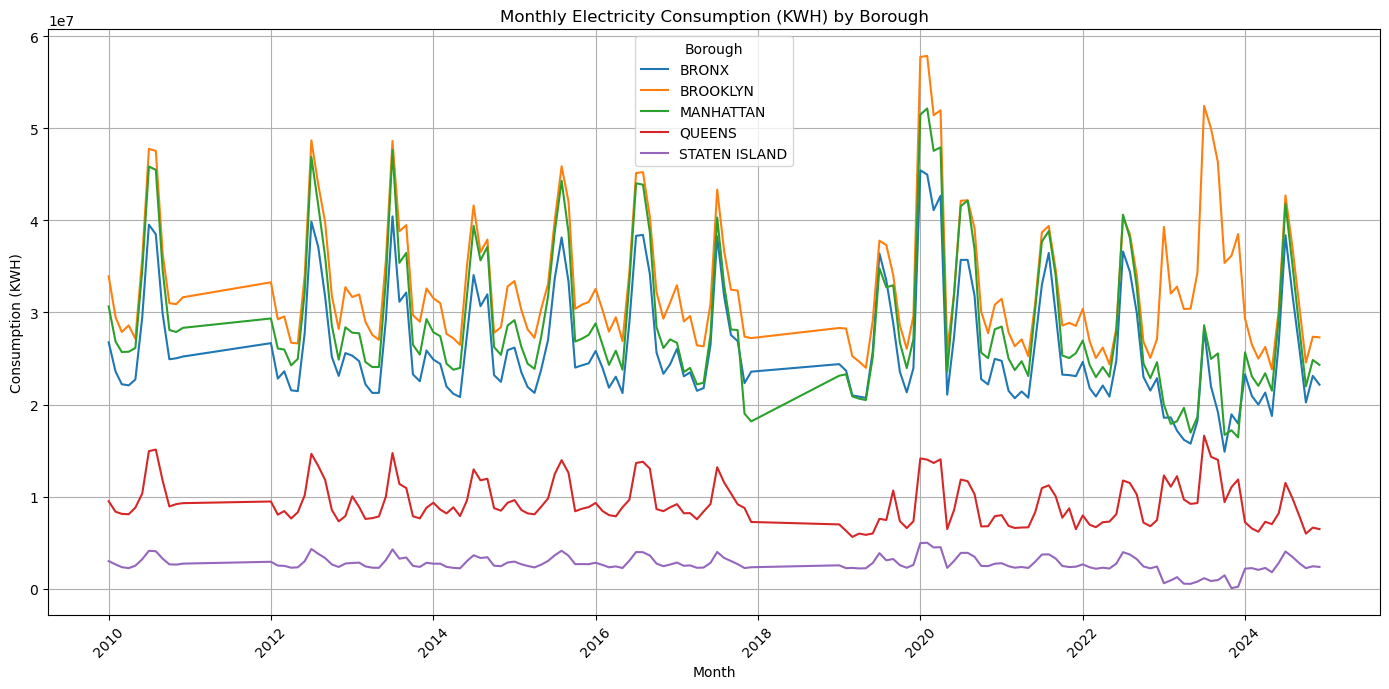

In [3]:
# Group by Month and Borough
monthly_borough_kwh = df_cleaned.groupby(
    [df_cleaned['Revenue Month'].dt.to_period('M'), 'Borough']
)['Consumption (KWH)'].sum().reset_index()

monthly_borough_kwh['Revenue Month'] = monthly_borough_kwh['Revenue Month'].dt.to_timestamp()

# Plot
plt.figure(figsize=(14,7))
for borough in monthly_borough_kwh['Borough'].unique():
    borough_data = monthly_borough_kwh[monthly_borough_kwh['Borough'] == borough]
    plt.plot(borough_data['Revenue Month'], borough_data['Consumption (KWH)'], label=borough)

plt.title("Monthly Electricity Consumption (KWH) by Borough")
plt.xlabel("Month")
plt.ylabel("Consumption (KWH)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Borough")
plt.tight_layout()
plt.show()

Has the seasonal Pattern changed over the years?

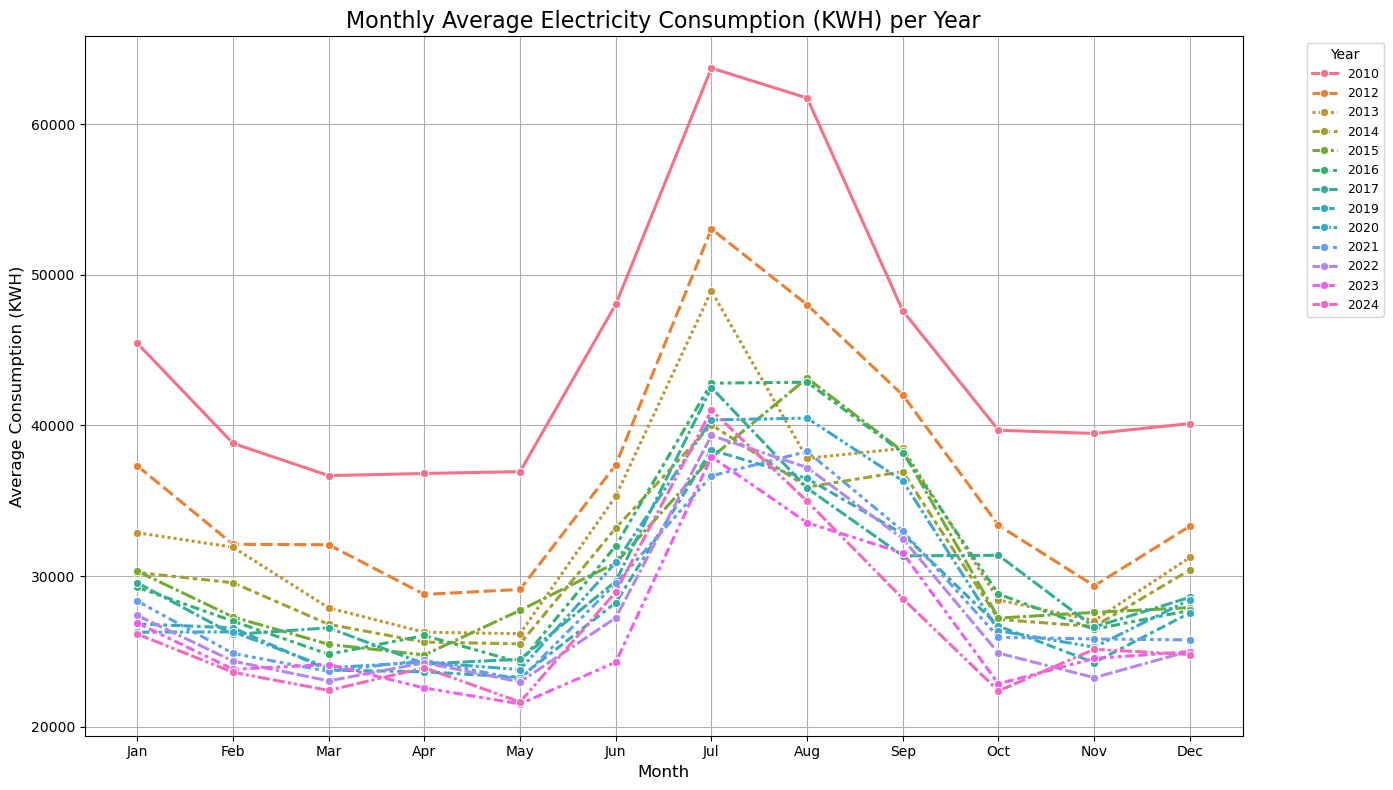

In [13]:
df['Revenue Month'] = pd.to_datetime(df['Revenue Month'], errors = 'coerce')

df_clean = df.dropna(subset=['Revenue Month', 'Consumption (KWH)'])

df_clean['Year'] = df_clean['Revenue Month'].dt.year
df_clean['Month'] = df_clean['Revenue Month'].dt.month

monthly_avg_kwh = df_clean.groupby(['Year', 'Month'])['Consumption (KWH)'].mean().reset_index()

pivot_df = monthly_avg_kwh.pivot(index='Month', columns='Year', values='Consumption (KWH)')

# Plotting
plt.figure(figsize=(14, 8), dpi=100)
sns.lineplot(data=pivot_df, linewidth=2.2, marker='o')
plt.title('Monthly Average Electricity Consumption (KWH) per Year', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Consumption (KWH)', fontsize=12)
plt.xticks(range(1, 13), [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.grid(True)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.tight_layout()
plt.show()



